In [107]:
##Data loading
import os.path

import pandas as pd

x_train = pd.read_csv("model_v2/x_train.csv", sep=";")
y_train = pd.read_csv("model_v2/y_train.csv", sep=";")

x_test = pd.read_csv("model_v2/x_test.csv", sep=";")
y_test = pd.read_csv("model_v2/y_test.csv", sep=";")

In [108]:
x_train.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_entre_finPEC_sortie,nbre_patient_UHCD,hour_of_day,UHCD_saturee,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,83,2,0.112451,16.0,2,0.044608,4,0.651596,14.0,0.285714,...,0.0,2,20,0,5,0,49,12,4,71.800000
1,23,1,0.013967,11.0,2,0.044608,4,0.800532,2.0,0.000000,...,1.0,4,3,0,2,1,7,2,1,31.200000
2,22,1,0.271388,11.0,2,0.019395,5,0.813830,9.0,0.555556,...,0.0,12,8,1,0,1,48,11,4,244.400000
3,46,2,0.020837,11.0,2,0.005201,5,0.680851,7.0,0.285714,...,0.0,7,9,0,3,1,19,5,2,46.266667
4,23,2,0.009139,11.0,2,0.008572,5,0.648936,7.0,0.142857,...,0.0,5,8,0,2,1,32,8,3,18.533333


In [109]:
count_nan_in_df = x_train.isnull().sum().sum()
print ('Count of NaN "x_train": ' + str(count_nan_in_df))

Count of NaN "x_train": 0


In [110]:
count_nan_in_df = y_train.isnull().sum().sum()
print ('Count of NaN "y_train": ' + str(count_nan_in_df))

Count of NaN "y_train": 0


In [111]:
count_nan_in_df = x_test.isnull().sum().sum()
print ('Count of NaN "x_test": ' + str(count_nan_in_df))

Count of NaN "x_test": 1


In [112]:
count_nan_in_df = y_test.isnull().sum().sum()
print ('Count of NaN "y_test": ' + str(count_nan_in_df))

Count of NaN "y_test": 0


In [113]:
print(x_test.shape)
x_test["wait_time"] = y_test.wait_time
x_test.dropna(inplace=True)

(26450, 29)


In [114]:
x_test.shape

(26449, 30)

In [115]:
x_test.reset_index(drop=True, inplace=True)
y_test = pd.DataFrame(x_test.wait_time)
x_test.drop(['wait_time'], axis=1, inplace=True)

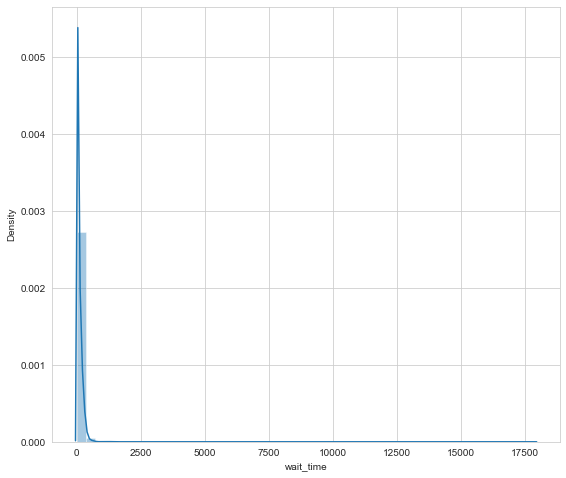

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
#plt.subplot(1, 2, 2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

#### Box plot

#### a. Box plot of raw train dataset

<AxesSubplot:xlabel='wait_time'>

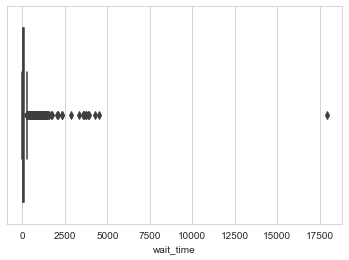

In [117]:
sns.boxplot(x=y_train['wait_time'])

In [118]:
#Based on z-score
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]
    print("Finished!")
    return df

In [119]:
mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_train[(y_train['wait_time'] > mean+(2*sd))]
print(mean+(2*sd))
print("Z-Score Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

354.0650603717864
Z-Score Outlier percentage in wait time: 0.021


In [120]:
#Based on IQR
q75,q25 = np.percentile(np.array(y_train),[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df = y_train[(y_train['wait_time'] > max)]
print("min: ", min)
print("max: ", max)
print("IQR Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

min:  -146.5
max:  281.5
IQR Outlier percentage in wait time: 0.050


In [121]:
x_train["wait_time"] = y_train.wait_time
x_train = x_train[(x_train['wait_time'] <= max)]
x_train.reset_index(inplace=True, drop=True)
y_train = pd.DataFrame(x_train["wait_time"])
x_train.drop(['wait_time'], axis=1, inplace=True)

In [122]:
x_train.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_entre_finPEC_sortie,nbre_patient_UHCD,hour_of_day,UHCD_saturee,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,83,2,0.112451,16.0,2,0.044608,4,0.651596,14.0,0.285714,...,0.0,2,20,0,5,0,49,12,4,71.800000
1,23,1,0.013967,11.0,2,0.044608,4,0.800532,2.0,0.000000,...,1.0,4,3,0,2,1,7,2,1,31.200000
2,22,1,0.271388,11.0,2,0.019395,5,0.813830,9.0,0.555556,...,0.0,12,8,1,0,1,48,11,4,244.400000
3,46,2,0.020837,11.0,2,0.005201,5,0.680851,7.0,0.285714,...,0.0,7,9,0,3,1,19,5,2,46.266667
4,23,2,0.009139,11.0,2,0.008572,5,0.648936,7.0,0.142857,...,0.0,5,8,0,2,1,32,8,3,18.533333


#### b. Box plot of train dataset after outlier removal with IQR distance

<AxesSubplot:xlabel='wait_time'>

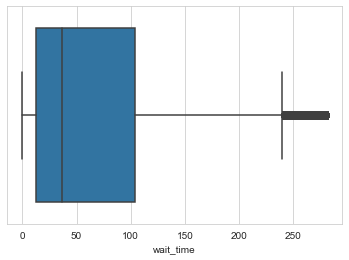

In [123]:
sns.boxplot(x=y_train['wait_time'])

##### Train wait time dist plot

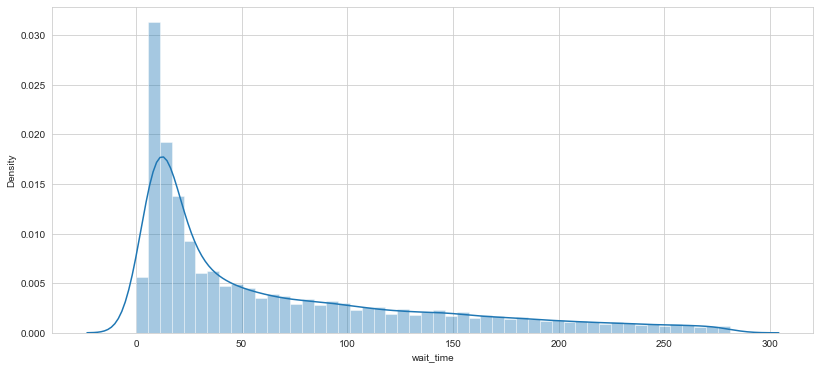

In [124]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
plt.show()

In [125]:
x_train.shape

(58628, 29)

In [126]:
y_train.describe()

,wait_time
count,58628.000000
mean,67.483898
std,69.405618
min,0.000000
25%,13.000000
50%,37.000000
75%,104.000000
max,281.000000


#### Wait time train target feature transformation

In [127]:
target_transf = 0
if target_transf:
    df_transf = x_train.copy(deep=True)
    df_transf.wait_time = np.log(df_transf.wait_time + 0.0000001)

In [128]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf['wait_time'])
    plt.show()

In [129]:
if target_transf:
    df_transf.wait_time.describe()

In [130]:
if target_transf:
    sns.boxplot(x=df_transf['wait_time'])

In [131]:
if target_transf:
    #Based on IQR
    q75,q25 = np.percentile(np.array(df_transf.wait_time),[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_transf = df_transf[(df_transf['wait_time'] <= max)]
    df_transf = df_transf[(df_transf['wait_time'] >= min)]
    df_transf.reset_index(drop=True, inplace=True)

In [132]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf['wait_time'])
    plt.show()

In [133]:
if target_transf:
    df_transf.wait_time.describe()

In [134]:
if target_transf:
    df_transf.wait_time = np.round(df_transf.wait_time)

In [135]:
if target_transf:
    df_transf.wait_time.describe()

#### Wait time test feature transformation

In [136]:
if target_transf:
    df_transf_test = x_test.copy(deep=True)
    df_transf_test['wait_time'] = y_test.wait_time
    df_transf_test.wait_time = np.log(df_transf_test.wait_time + 0.0000001)

In [137]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf_test['wait_time'])
    plt.show()

In [138]:
if target_transf:
    df_transf_test.wait_time.describe()

In [139]:
if target_transf:
    sns.boxplot(x=df_transf_test['wait_time'])

In [140]:
if target_transf:
    #Based on train dataset IQR
    df_transf_test = df_transf_test[(df_transf_test['wait_time'] <= max)]
    df_transf_test = df_transf_test[(df_transf_test['wait_time'] >= min)]
    df_transf_test.reset_index(drop=True, inplace=True)

In [141]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf_test['wait_time'])
    plt.show()

In [142]:
if target_transf:
    df_transf_test.wait_time.describe()

In [143]:
if target_transf:
    df_transf_test.wait_time = np.round(df_transf_test.wait_time)

In [144]:
if target_transf:
    df_transf_test.wait_time.describe()

#### Outlier further removal

mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_train[(y_train['wait_time'] > mean+(3*sd))]
print(mean+(3*sd))
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

#Based on IQR
q75,q25 = np.percentile(np.array(y_train),[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df = y_train[(y_train['wait_time'] > max)]
print(max)
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

x_train.shape

x_train = remove_outliers(x_train, ["wait_time"],3)
x_train.reset_index(inplace=True, drop=True)
y_train = pd.DataFrame(x_train["wait_time"])
x_train.drop(['wait_time'], axis=1, inplace=True)
sns.boxplot(x=y_train['wait_time'])

x_train.shape

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
plt.show()

### c. Outlier removal from test dataset

<AxesSubplot:xlabel='wait_time'>

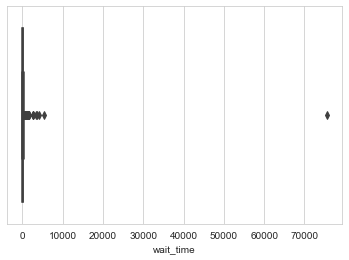

In [145]:
sns.boxplot(x=y_test['wait_time'])

In [146]:
mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_test[(y_test['wait_time'] > mean+(2*sd))]
print(mean+(3*sd))
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

275.7007525380926
Outlier percentage in wait time: 0.050


In [147]:
df = y_test[(y_test['wait_time'] > max)]
print(max)
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))


281.5
Outlier percentage in wait time: 0.023


<AxesSubplot:xlabel='wait_time'>

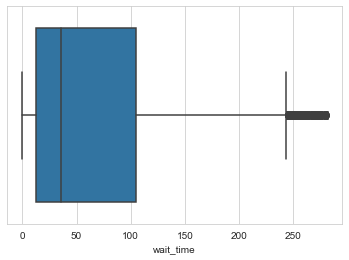

In [148]:
x_test['wait_time'] = y_test.wait_time
x_test = x_test[(x_test['wait_time'] <= max)]
x_test.reset_index(inplace=True, drop=True)
y_test = pd.DataFrame(x_test["wait_time"])
sns.boxplot(x=y_test['wait_time'])

In [149]:
y_test = pd.DataFrame(x_test.wait_time)
x_test.drop(['wait_time'], axis=1, inplace=True)

### d. Plot Daily and Hourly, wait time and arrivals, statistics

In [150]:
df_plot = pd.DataFrame()
df_plot['day_of_week'] = x_train['day_of_week']
df_plot['wait_time'] = y_train['wait_time']
df_plot = df_plot.groupby(by=["day_of_week"]).mean()
df_plot.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_plot

,wait_time
Mon,79.419050
Tue,73.025375
Wed,63.766659
Thu,70.852674
Fri,70.554765
Sat,58.905137
Sun,54.967077


<AxesSubplot:>

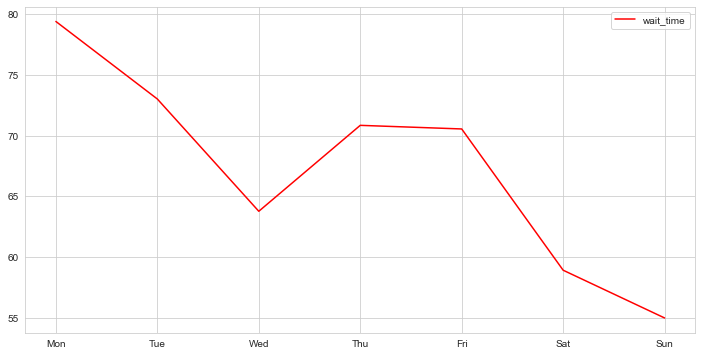

In [151]:
df_plot.plot(figsize=(12, 6), color='red')

In [152]:
df_plot.describe()

,wait_time
count,7.000000
mean,67.355820
std,8.543064
min,54.967077
25%,61.335898
50%,70.554765
75%,71.939025
max,79.419050


In [153]:
df_plot_hourly = pd.DataFrame()
df_plot_hourly['hour_of_day'] = x_train['hour_of_day']
df_plot_hourly['wait_time'] = y_train['wait_time']
df_plot_hourly = df_plot_hourly.groupby(by=["hour_of_day"]).mean()
df_plot_hourly

,wait_time
hour_of_day,
0,43.313623
1,34.001812
2,29.939294
3,25.429319
4,25.056283
5,22.329252
6,18.870756
7,25.055949
8,31.691434


<AxesSubplot:xlabel='hour_of_day'>

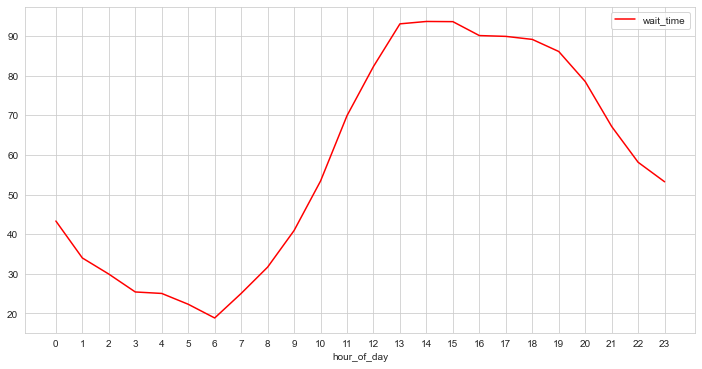

In [154]:
df_plot_hourly.plot.line(figsize=(12, 6), color='red', xticks = df_plot_hourly.index)

In [155]:
#Plot arrivals
df_plot_arrivals = pd.DataFrame()
df_plot_arrivals['day_of_week'] = x_train['day_of_week']
df_plot_arrivals['nbre_patient_urgence'] = x_train['nbre_patient_urgence']
df_plot_arrivals = df_plot_arrivals.groupby(by=["day_of_week"]).mean()
df_plot_arrivals.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_plot_arrivals

,nbre_patient_urgence
Mon,17.320797
Tue,15.439429
Wed,14.657066
Thu,14.999019
Fri,15.312589
Sat,13.654600
Sun,13.113483


<AxesSubplot:>

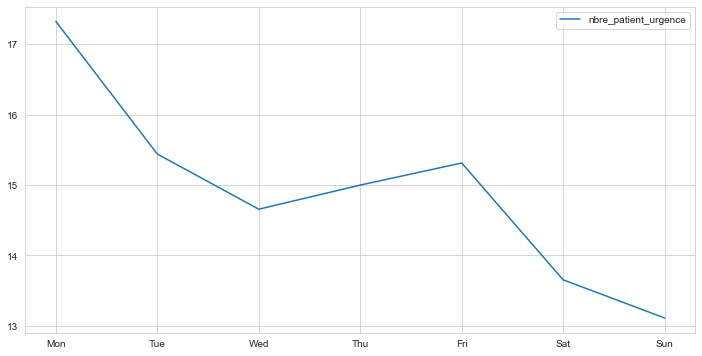

In [156]:
df_plot_arrivals.plot(figsize=(12, 6))

In [157]:
df_plot_arrivals.describe()

,nbre_patient_urgence
count,7.000000
mean,14.928140
std,1.361826
min,13.113483
25%,14.155833
50%,14.999019
75%,15.376009
max,17.320797


In [158]:
df_plot_arrivals_hourly = pd.DataFrame()
df_plot_arrivals_hourly['hour_of_day'] = x_train['hour_of_day']
df_plot_arrivals_hourly['nbre_patient_urgence'] = x_train['nbre_patient_urgence']
df_plot_arrivals_hourly = df_plot_arrivals_hourly.groupby(by=["hour_of_day"]).mean()
df_plot_arrivals_hourly

,nbre_patient_urgence
hour_of_day,
0,11.468563
1,9.163043
2,7.118102
3,5.454188
4,4.431937
5,3.960544
6,3.645126
7,4.044618
8,6.117132


<AxesSubplot:xlabel='hour_of_day'>

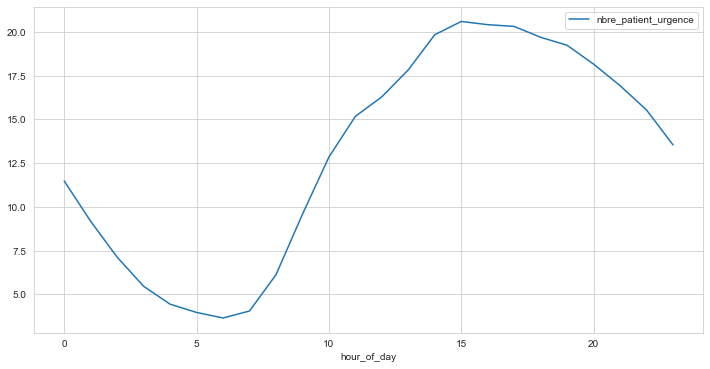

In [159]:
df_plot_arrivals_hourly.plot(figsize=(12, 6))

<AxesSubplot:xlabel='hour_of_day'>

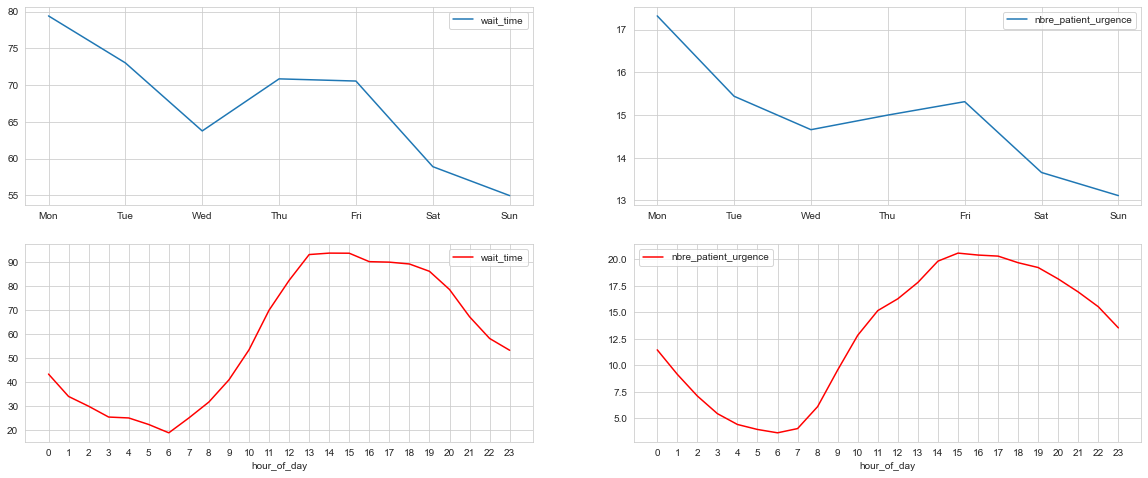

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,8))

df_plot.plot(ax=axes[0,0])

df_plot_arrivals.plot(ax=axes[0,1])

df_plot_hourly.plot(ax=axes[1,0], color='red', xticks = df_plot_hourly.index)

df_plot_arrivals_hourly.plot(ax=axes[1,1], color='red', xticks = df_plot_arrivals_hourly.index)

# Features correlation

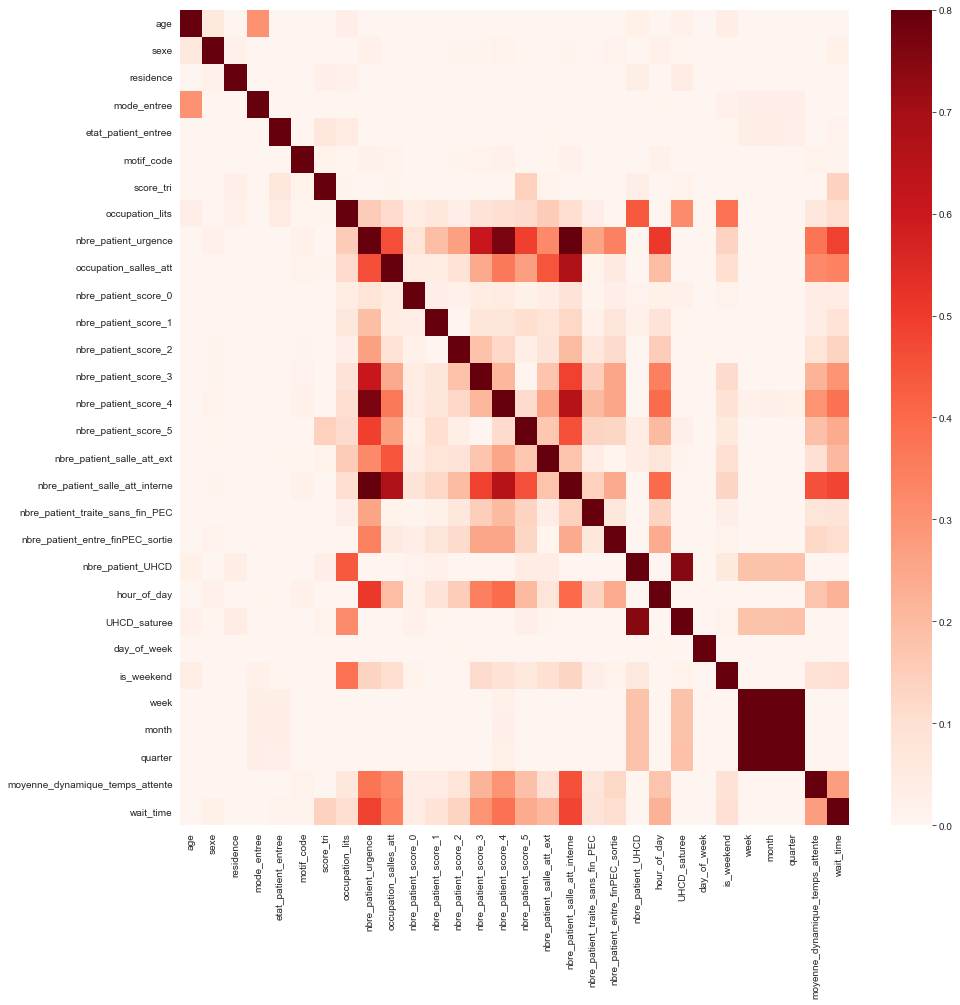

In [161]:
import matplotlib.pyplot as plt

train_data = x_train.copy(deep=True)
train_data['wait_time'] = y_train.wait_time

C_mat = train_data.corr()
fig = plt.figure(figsize=(15, 15))

sns.heatmap(C_mat, vmin=0, vmax=.8, cmap=plt.cm.Reds)
plt.show()

In [162]:
# Saving feature names for later use
feature_list = list(x_train.columns)
feature_list

['age',
 'sexe',
 'residence',
 'mode_entree',
 'etat_patient_entree',
 'motif_code',
 'score_tri',
 'occupation_lits',
 'nbre_patient_urgence',
 'occupation_salles_att',
 'nbre_patient_score_0',
 'nbre_patient_score_1',
 'nbre_patient_score_2',
 'nbre_patient_score_3',
 'nbre_patient_score_4',
 'nbre_patient_score_5',
 'nbre_patient_salle_att_ext',
 'nbre_patient_salle_att_interne',
 'nbre_patient_traite_sans_fin_PEC',
 'nbre_patient_entre_finPEC_sortie',
 'nbre_patient_UHCD',
 'hour_of_day',
 'UHCD_saturee',
 'day_of_week',
 'is_weekend',
 'week',
 'month',
 'quarter',
 'moyenne_dynamique_temps_attente']

#### Numpy arrays without target transformation

In [163]:
# Use numpy to convert to arrays
import numpy as np  # Labels are the values we want to predict

train_features = np.array(x_train)
test_features = np.array(x_test)
train_labels = np.array(y_train)
test_labels = np.array(y_test)

#### Numpy arrays with target transformation

In [164]:
if target_transf:
    # Use numpy to convert to arrays
    import numpy as np  # Labels are the values we want to predict

    train_labels = np.array(df_transf.wait_time)
    test_labels = np.array(df_transf_test.wait_time)

    #Eleminate most correlated feature with the target
    df_transf.drop(columns=['moyenne_dynamique_temps_attente'], axis=1, inplace=True)
    df_transf_test.drop(columns=['moyenne_dynamique_temps_attente'], axis=1, inplace=True)

    df_transf.drop(['wait_time'], axis=1, inplace=True)
    df_transf_test.drop(['wait_time'], axis=1, inplace=True)

    train_features = np.array(df_transf)
    test_features = np.array(df_transf_test)

In [165]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (58628, 29)
Training Labels Shape: (58628, 1)
Testing Features Shape: (25121, 29)
Testing Labels Shape: (25121, 1)


In [166]:
# The baseline predictions are the historical averages
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#Ecart moyenne(wait_time-moyenne_temps_att)
baseline_preds = test_features[:, feature_list.index('moyenne_dynamique_temps_attente')]

#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2), ' minutes')

mae = mean_absolute_error(test_labels, baseline_preds)
mape = mean_absolute_percentage_error(test_labels, baseline_preds)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, baseline_preds)
rmse = mse ** .5

#Sans unité
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 48.645471728798434
mse: 5645.592411673115
rmse: 75.1371573302658
mape: 8916007382984.457  %


In [167]:
#Eleminate most correlated feature with the target
drop = 0
if drop:
    x_train.drop(columns=['moyenne_dynamique_temps_attente'], inplace=True)
    x_test.drop(columns=['moyenne_dynamique_temps_attente'], inplace=True)

In [168]:
train_features = np.array(x_train)
test_features = np.array(x_test)

In [169]:
print('Training Features Shape:', train_features.shape)
print('Testing Features Shape:', test_features.shape)

Training Features Shape: (58628, 29)
Testing Features Shape: (25121, 29)


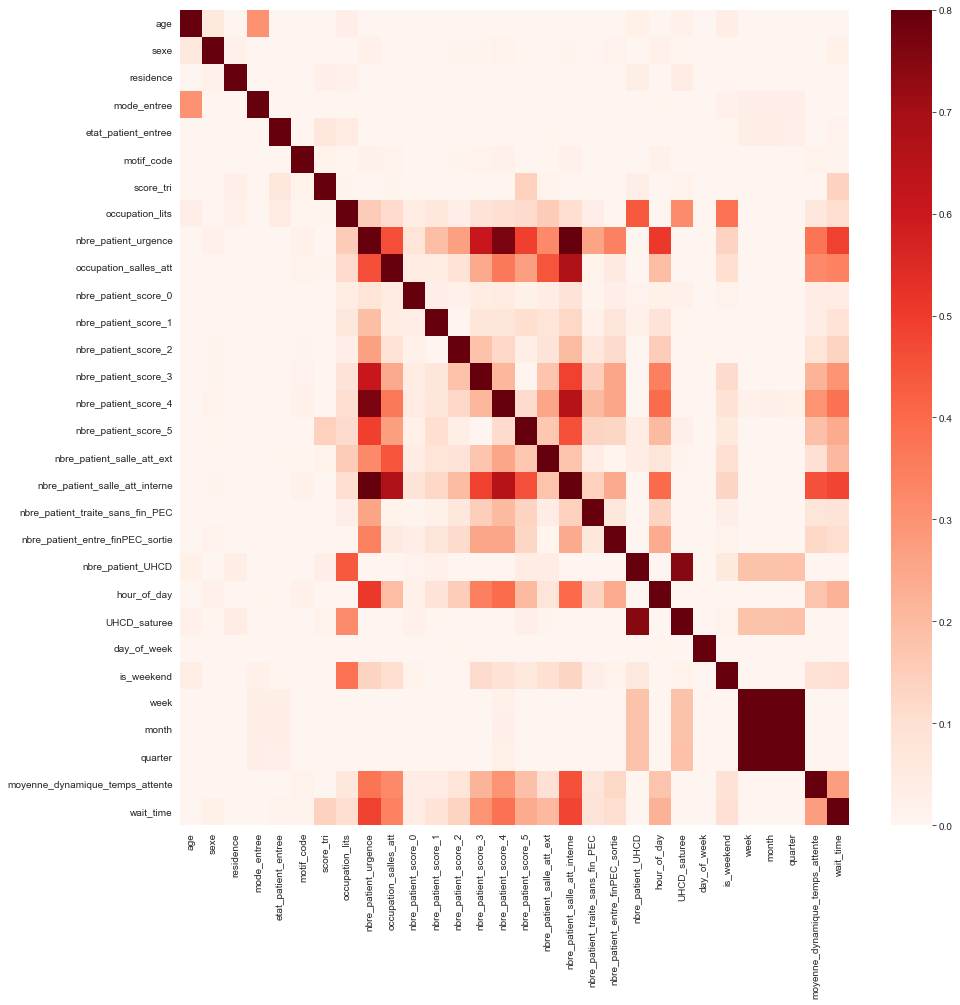

In [170]:
train_data = x_train.copy(deep=True)
train_data['wait_time'] = y_train.wait_time

C_mat = train_data.corr()

fig = plt.figure(figsize=(15, 15))

sns.heatmap(C_mat, vmin=0, vmax=.8, cmap=plt.cm.Reds)
plt.show()

## Scaling

In [171]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Train Model

### 1. Random Forest

##### Out of Bag Error Rate

In [172]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor  # Instantiate model
import time
fit_rf = RandomForestRegressor(max_features=0.1, max_depth=9,
                               random_state=21)
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 1
max_estimators = 100

error_rate = {}

start = time.time()
for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(train_features[:5000,], train_labels[:5000,])

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error
    if i % 50 == 0:
        print("Elapsed time: ", time.time() - start, "s")
print("Total elapsed time: ", time.time() - start, "s")
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

Elapsed time:  1.0243232250213623 s
Elapsed time:  3.5895745754241943 s
Total elapsed time:  3.5895745754241943 s


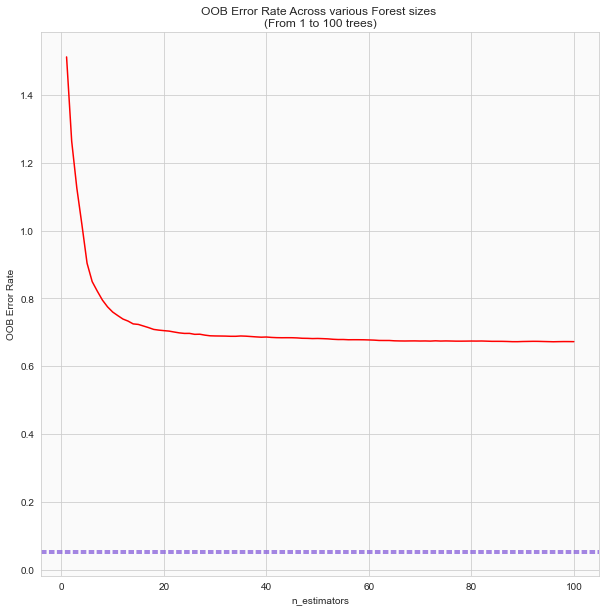

In [173]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055,
            color='#875FDB',
            linestyle='--')
plt.axhline(0.05,
            color='#875FDB',
            linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From ' + str(min_estimators) + ' to ' + str(max_estimators) + ' trees)')
plt.show()

##### Model RF

In [174]:
rf = RandomForestRegressor(n_estimators=80, max_features=0.1, max_depth=9,
                           random_state=21)  # Train the model on training data

#Start timer
start = time.time()
rf.fit(train_features, train_labels.ravel())

#End timer
end = time.time()
print("The time of execution of above program is :", end - start, " s")

"""
Explanation for train_labels:
.ravel will convert that array shape to (n, ) (i.e. flatten it)
"""

The time of execution of above program is : 1.6993319988250732  s


'\nExplanation for train_labels:\n.ravel will convert that array shape to (n, ) (i.e. flatten it)\n'

In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, mean_absolute_percentage_error

# Use the forest's predict method on the test data

#Start timer
start = time.time()
predictions = rf.predict(test_features)  # Calculate the absolute errors

#End timer
end = time.time()
print("The time of execution of above program is :", end - start, " s")

#errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), ' minutes.')

#predictions = np.exp(predictions)

mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions)
rmse = mse ** .5

#Sans unité
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

The time of execution of above program is : 0.17843198776245117  s
mae: 42.8627087145761
mse: 3210.9591312732073
rmse: 56.6653256522294
mape: 14207415592795.375  %


(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

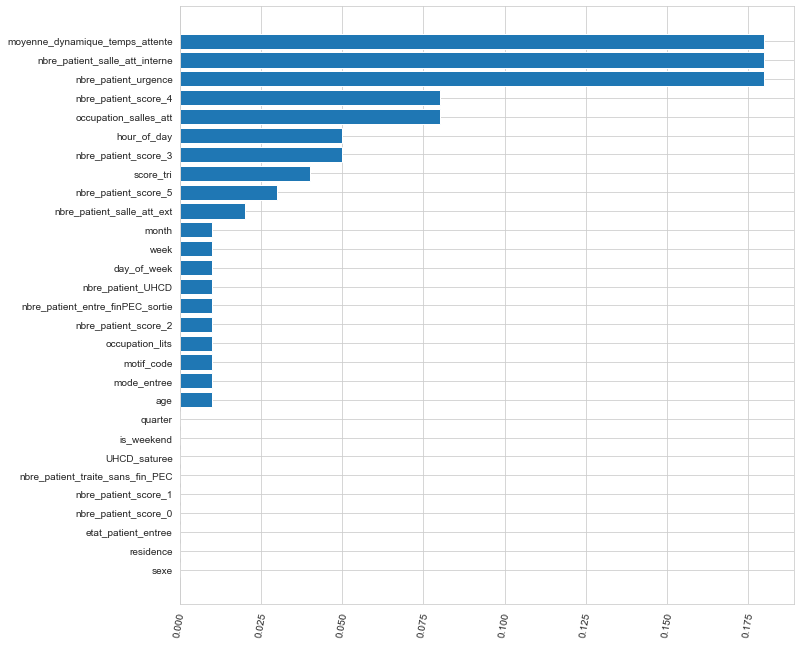

In [176]:
# Get numerical feature importances
importances = list(rf.feature_importances_)  # List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in
                       zip(feature_list, importances)]  # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)  # Print out the feature and importances
"""for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))"""

feature, importance = zip(*feature_importances)
plt.figure(figsize=(11,11))
plt.barh(feature, importance)
plt.xticks(rotation = 80)

##### RF with only the 8 most important variables

In [177]:
# New random forest with only the 8 most important variables
rf_most_important = RandomForestRegressor(n_estimators=80, max_features=0.1, max_depth=9,
                                          random_state=18)  # Extract the two most important features
important_indices = [feature_list.index('moyenne_dynamique_temps_attente'), feature_list.index('nbre_patient_salle_att_interne'),
                     feature_list.index('nbre_patient_urgence'), feature_list.index('occupation_salles_att'),
                     feature_list.index('nbre_patient_score_4'), feature_list.index('hour_of_day'),
                     feature_list.index('nbre_patient_score_3'), feature_list.index('score_tri'),

                     ]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]  # Train the random forest

rf_most_important.fit(train_important, train_labels)  # Make predictions and determine the error
predictions_v2 = rf_most_important.predict(test_important)
#predictions_v2 = np.exp(predictions_v2)

mae = mean_absolute_error(test_labels, predictions_v2)
mape = mean_absolute_percentage_error(test_labels, predictions_v2)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions_v2)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 41.39090833956808
mse: 3113.906069736089
rmse: 55.80238408648943
mape: 11416503750213.873  %


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

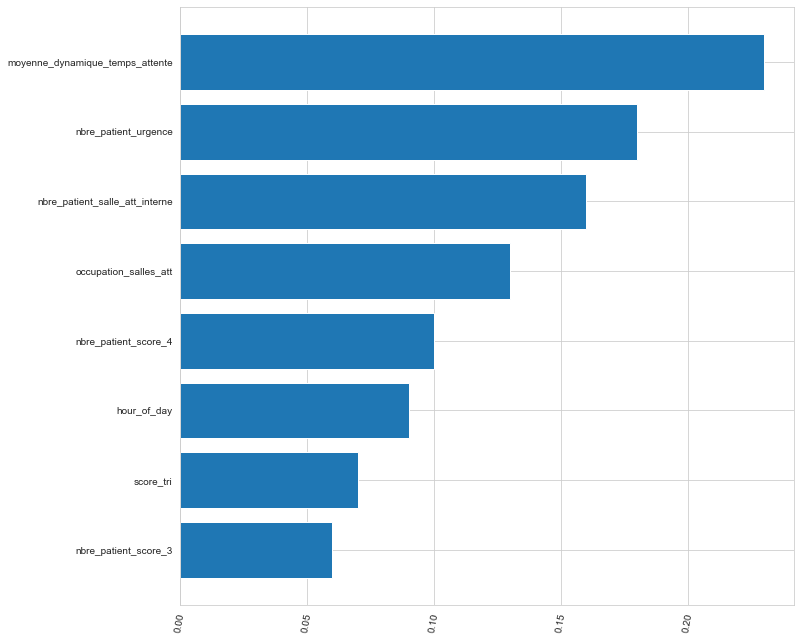

In [178]:
# Get numerical feature importances
importances = list(rf_most_important.feature_importances_)  # List of tuples with variable and importance
important_feature_list = ['moyenne_dynamique_temps_attente','nbre_patient_salle_att_interne',
                          'nbre_patient_urgence','occupation_salles_att',
                          'nbre_patient_score_4', 'hour_of_day',
                          'nbre_patient_score_3', 'score_tri',
                          ]
feature_importances = [(feature, round(importance, 2)) for feature, importance in
                       zip(important_feature_list, importances)]  # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)  # Print out the feature and importances
"""for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))"""

feature, importance = zip(*feature_importances)
plt.figure(figsize=(11, 11))
plt.barh(feature, importance)
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Actual and Predicted Values')

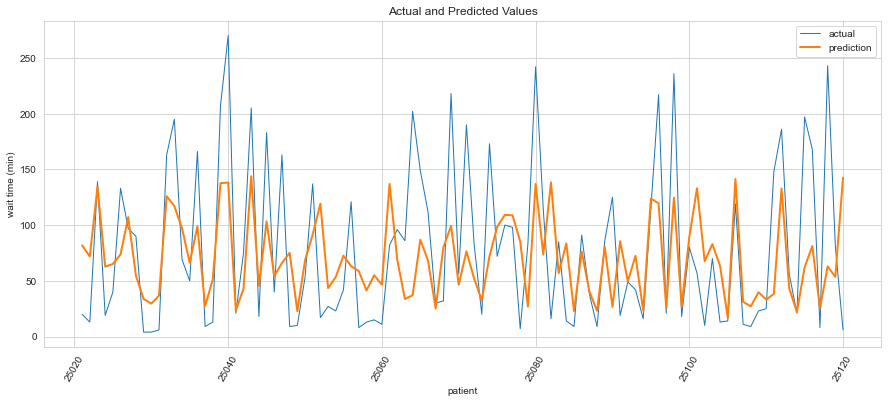

In [179]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': predictions_v2})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values')

In [180]:
"""from sklearn.model_selection import GridSearchCV

fit_rf = RandomForestRegressor(n_estimators=500, random_state=21)

np.random.seed(21)
start = time.time()

param_dist = {'max_depth': [7, 8, 9, 10, 11],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', 0.1, None],
              'criterion': ['absolute_error', 'squared_error']}
# CV : 10 cross validation
# 3 job en //
# les parametre du dictioannire qu'il va étudier
# fit_rf c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel
# algo il prépare ces params
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(train_features, train_labels)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))"""

"from sklearn.model_selection import GridSearchCV\n\nfit_rf = RandomForestRegressor(n_estimators=500, random_state=21)\n\nnp.random.seed(21)\nstart = time.time()\n\nparam_dist = {'max_depth': [7, 8, 9, 10, 11],\n              'bootstrap': [True, False],\n              'max_features': ['auto', 'sqrt', 'log2', 0.1, None],\n              'criterion': ['absolute_error', 'squared_error']}\n# CV : 10 cross validation\n# 3 job en //\n# les parametre du dictioannire qu'il va étudier\n# fit_rf c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel\n# algo il prépare ces params\ncv_rf = GridSearchCV(fit_rf, cv = 10,\n                     param_grid=param_dist,\n                     n_jobs = 3)\n\ncv_rf.fit(train_features, train_labels)\nprint('Best Parameters using grid search: \n',\n      cv_rf.best_params_)\nend = time.time()\nprint('Time taken in grid search: {0: .2f}'.format(end - start))"

## 2. Lasso

In [181]:
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, mean_absolute_percentage_error

%matplotlib inline

#plt.figure(figsize=(40, 36))

# Initialise the subplot function using number of rows and columns
#plt.subplots(3, 2)


def lasso_regression(alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=1e5)
    lassoreg.fit(train_features, train_labels)
    y_pred = lassoreg.predict(test_features)

    mae = mean_absolute_error(test_labels, y_pred)
    mape = mean_absolute_percentage_error(test_labels, y_pred)  # Calculate and display accuracy
    mse = mean_squared_error(test_labels, y_pred)
    rmse = mse ** .5
    print("\n..... alpha= ", alpha, " .................")
    print('mae:', mae)
    print('mse:', mse)
    print('rmse:', rmse)
    print('mape:', mape, ' %')

    #Check if a plot is to be made for the entered alpha
    """if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        #plt.tight_layout()
        plt.plot(test_features[-80:], y_pred[-80:])
        plt.plot(test_features[-80:], test_labels[-80:], '.')
        plt.title('Plot for alpha: %.3g' % alpha)"""

    #Return the result in pre-defined format
    rss = sum((y_pred - test_labels) ** 2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [182]:
#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 30)]
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, 10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10: 231, 1e-5: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(alpha_lasso[i], models_to_plot)

# Packing all the plots and displaying them
#plt.tight_layout()
#plt.show()


..... alpha=  1e-15  .................
mae: 43.5945454374285
mse: 3403.2320245668047
rmse: 58.3372267473078
mape: 11009705236979.543  %


ValueError: could not broadcast input array from shape (31,) into shape (24,)

In [183]:
coef_matrix_lasso['rss'].apply(lambda x: sum(x))

## 3. Huber regressor

In [184]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression

huber = HuberRegressor().fit(train_features, train_labels)
huber.score(train_features, train_labels)
y_pred = huber.predict(test_features)

print("*Huber coefficients:")
mae = mean_absolute_error(test_labels, y_pred)
mape = mean_absolute_percentage_error(test_labels, y_pred)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

#Linear regression
linear = LinearRegression().fit(train_features, train_labels)
y_pred2 = linear.predict(test_features)

print("\n*Linear Regression coefficients:")
mae = mean_absolute_error(test_labels, y_pred2)
mape = mean_absolute_percentage_error(test_labels, y_pred2)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred2)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*Huber coefficients:
mae: 41.955144796140004
mse: 3526.479577215153
rmse: 59.384169415890234
mape: 9552648714876.57  %

*Linear Regression coefficients:
mae: 43.59454570864087
mse: 3403.2320164608723
rmse: 58.337226677833016
mape: 11009706534449.96  %


Text(0.5, 1.0, 'Actual and Predicted Values: Huber regressor')

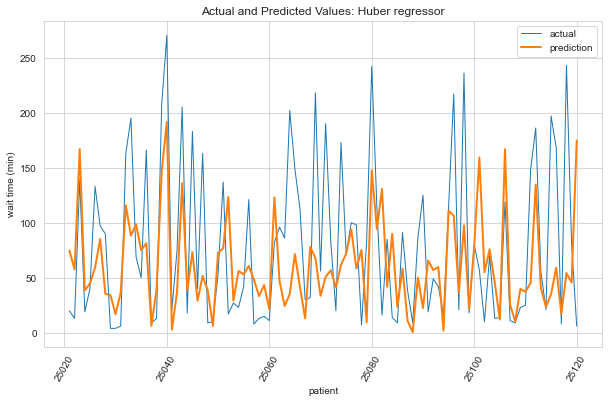

In [185]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': y_pred})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values: Huber regressor')

Text(0.5, 1.0, 'Actual and Predicted Values: Linear regressor')

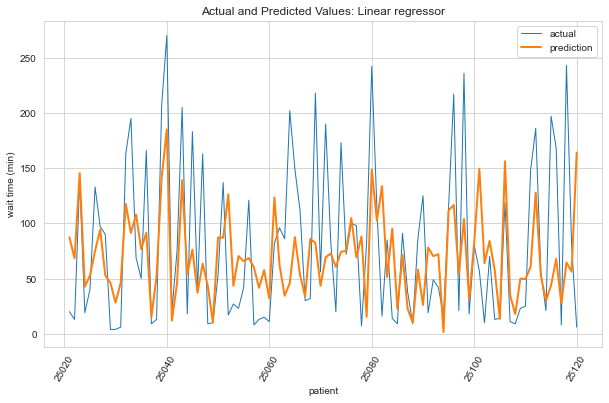

In [186]:
%matplotlib inline
plt.figure(figsize=(10, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': y_pred2.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values: Linear regressor')

## 4. SVR

In [187]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_rbf = SVR(kernel="rbf")
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly")

In [188]:
svr_rbf = svr_rbf.fit(train_features, train_labels.ravel())
y_pred_rbf = svr_rbf.predict(test_features)

print("*SVR(kernel='rbf') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_rbf)
mape = mean_absolute_percentage_error(test_labels, y_pred_rbf)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_rbf)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='rbf') coefficients:
mae: 41.375317460217396
mse: 3613.4243735480077
rmse: 60.111765683167285
mape: 8757970624034.243  %


In [189]:
svr_lin = svr_lin.fit(train_features, train_labels.ravel())
y_pred_lin = svr_lin.predict(test_features)

print("*SVR(kernel='linear') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_lin)
mape = mean_absolute_percentage_error(test_labels, y_pred_lin)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_lin)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='linear') coefficients:
mae: 41.96390719001179
mse: 3628.411509759721
rmse: 60.236297277967886
mape: 9724775192194.773  %


In [190]:
svr_poly = svr_poly.fit(train_features, train_labels.ravel())
y_pred_poly = svr_poly.predict(test_features)

print("*SVR(kernel='poly') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_poly)
mape = mean_absolute_percentage_error(test_labels, y_pred_poly)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_poly)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='poly') coefficients:
mae: 40.54278914727545
mse: 3564.107370384581
rmse: 59.70014548043062
mape: 8279850084934.21  %


## 5. DNN

In [191]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras import backend as K

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [192]:
from keras.losses import mean_squared_error as mse

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

In [193]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(25, input_dim=train_features.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(18, activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                750       
                                                                 
 dense_1 (Dense)             (None, 18)                468       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,237
Trainable params: 1,237
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Define checkpoints
checkpoint_name = os.path.join('model_v2', 'dnn_models', 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5')
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(train_features, train_labels, epochs=150, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/200
1441/1466 [============================>.] - ETA: 0s - loss: 47.2059 - mean_absolute_error: 47.2059
Epoch 1: val_loss improved from inf to 41.81835, saving model to model_v2\dnn_models\Weights-001--41.81835.hdf5
1466/1466 [==============================] - 3s 1ms/step - loss: 47.1058 - mean_absolute_error: 47.1058 - val_loss: 41.8183 - val_mean_absolute_error: 41.8183
Epoch 2/200
1466/1466 [==============================] - ETA: 0s - loss: 41.5248 - mean_absolute_error: 41.5248
Epoch 2: val_loss improved from 41.81835 to 40.84587, saving model to model_v2\dnn_models\Weights-002--40.84587.hdf5
1466/1466 [==============================] - 2s 1ms/step - loss: 41.5248 - mean_absolute_error: 41.5248 - val_loss: 40.8459 - val_mean_absolute_error: 40.8459
Epoch 3/200
1461/1466 [============================>.] - ETA: 0s - loss: 40.9786 - mean_absolute_error: 40.9786
Epoch 3: val_loss improved from 40.84587 to 40.57045, saving model to model_v2\dnn_models\Weights-003--40.57045.hdf5


In [197]:
# Load wights file of the best model :
import os

wights_file = os.path.join('model_v2', 'dnn_models', 'Weights-168--37.38477.hdf5')  # choose the best checkpoint
NN_model.load_weights(wights_file)  # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [198]:
predictions = NN_model.predict(test_features)
#predictions
predictions = np.nan_to_num(predictions, nan=np.nanmean(predictions))
test_labels.shape

786/786 [==============================] - 1s 720us/step


(25121, 1)

In [199]:
predictions.shape

(25121, 1)

In [200]:
#test_labels.dtype = 'float64'
#predictions.dtype = 'float64'
mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 37.51504988257689
mse: 3191.032196579465
rmse: 56.489221950558544
mape: 3453077110891.3823  %


Text(0.5, 1.0, 'Actual and Predicted Values')

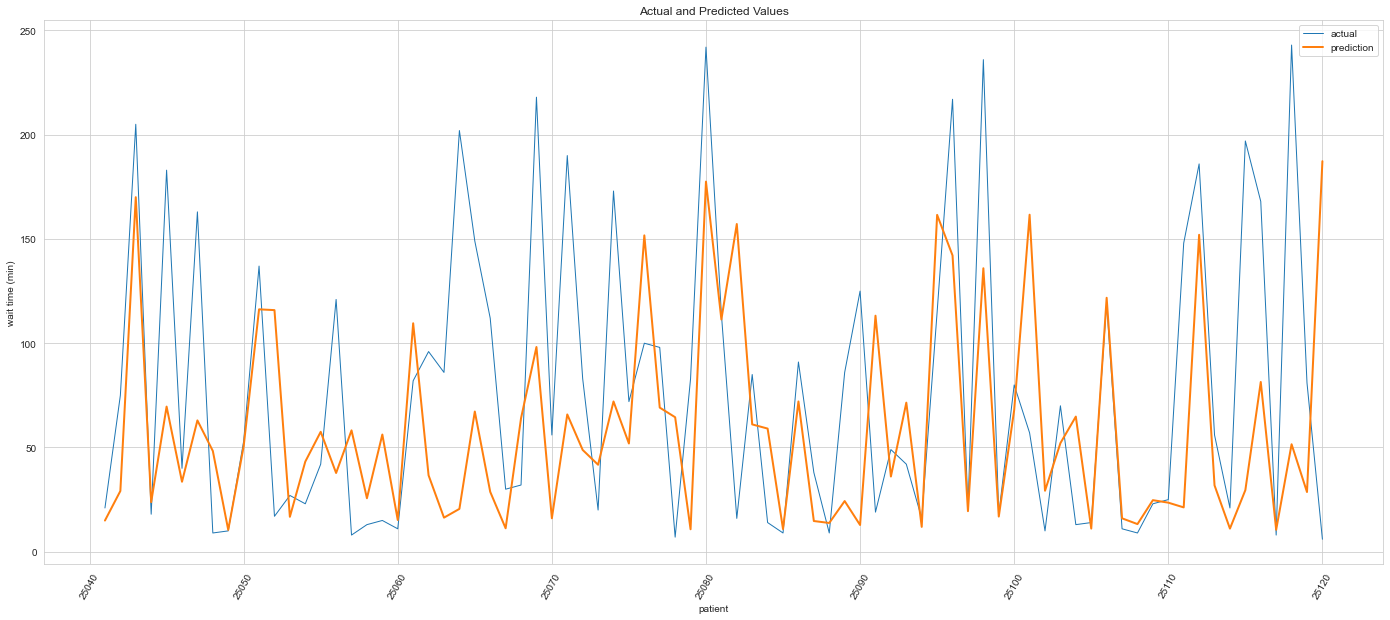

In [201]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(24, 10))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': predictions.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 80:]
predictions_data = predictions_data.iloc[len(predictions_data) - 80:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values')